<h1>IDENTIFICACION DE BILLETES</h1>
<p>Nombre: Javier Cueto</p>
<p>A continuación se realizará un análisis al dataset "data_banknote_authentication.txt", la cual contiene atributos de billetes y si estos son falsos o reales. Se aplicará reducción de dimensionalidad (PCA) y modelos de agrupamientos como K-Means, DBSCAN y JERARQUICO, donde se definirá cual se adapta mejor a los datos.</p>

<h3>EVALUACION CON PARAMETROS POR DEFECTO</h3>
<p>Se evaluarán los algoritmos de agrupamiento con la métrica de Silhouette Score, para identificar cual obtuvo mejor resultado. Se utilizarán parámetros por defecto para los algoritmos.</p>

Silhouette Score:

K-Means: 0.32905546282355036
DBSCAN: -0.004414883677421803
Jerárquico: 0.3130411761286322


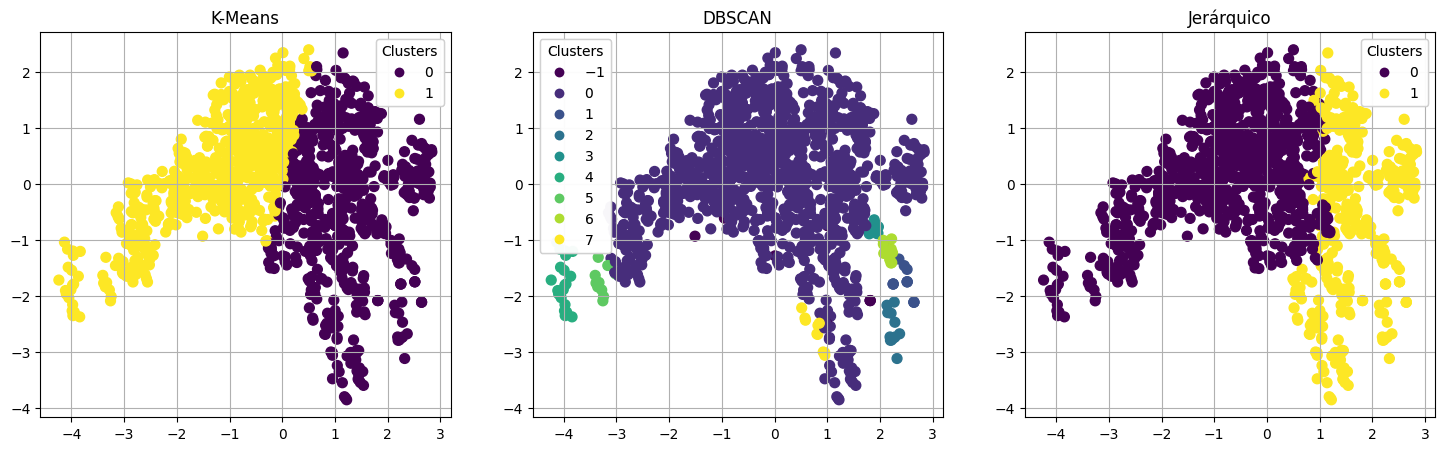

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargamos los datos y agregamos una columna de encabezado ya que no traia.
columnas = [
    'Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'
]
df = pd.read_csv("data_banknote_authentication.txt", header=None, names=columnas)


# Separamos los datos
X = df.drop('Class', axis=1)
y = df['Class']

# Escalamos los datos para que tengan igual peso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utilizamos PCA para reducir la dimensionalidad y poder observar mejor los datos
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicamos los algoritmos de agrupamiento
# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Jerárquico
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X_scaled)

# Evaluamos los resultados de los algoritmos
print("Silhouette Score:\n")
print("K-Means:", silhouette_score(X_scaled, labels_kmeans))

if len(set(labels_dbscan)) > 1 and (len(set(labels_dbscan)) - (-1 in labels_dbscan)) > 1:
    mask = labels_dbscan != -1
    if sum(mask) > 1:
        print("DBSCAN:", silhouette_score(X_scaled[mask], labels_dbscan[mask]))
    else:
        print("DBSCAN: No se puede calcular (muy pocos puntos sin ruido)")
else:
    print("DBSCAN: No se puede calcular (solo un cluster o mucho ruido)")

print("Jerárquico:", silhouette_score(X_scaled, labels_agg))

# Visualizamos los resultados en graficas para observar con mas detalles.
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

def plot_clusters(ax, X, labels, title):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    ax.set_title(title)
    ax.grid(True)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

plot_clusters(axs[0], X_pca, labels_kmeans, "K-Means")
plot_clusters(axs[1], X_pca, labels_dbscan, "DBSCAN")
plot_clusters(axs[2], X_pca, labels_agg, "Jerárquico")

plt.show()

<p>Los resultados demostraron que K-Means y Jerárquico fueron los que obtuvieron mejor resultado, gracias a la separación de grupos. DBSCAN tuvo el peor resultado, esto debe ser a que no encontró densidades claras y no pudo agrupar correctamente.</p>

<h1>MEJORES PARAMETROS</h1>

<h3>K-MEANS</h3>

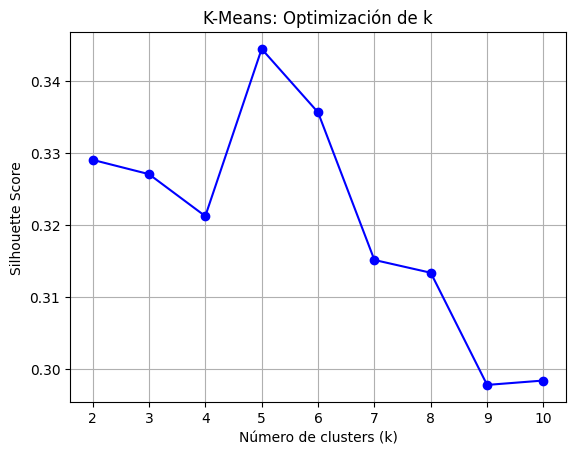

In [10]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ks = np.arange(2, 11)
scores_kmeans = np.zeros(len(ks))

for i, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    scores_kmeans[i] = silhouette_score(X_scaled, labels)

plt.plot(ks, scores_kmeans, 'bo-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("K-Means: Optimización de k")
plt.grid(True)
plt.show()

<p>Según los resultados, con 5 clusters es cuando se obtiene el mayor Silhouette Score con un valor de 0.34, siendo un poco superior al utilizar 2 clusters.</p>

<h3>DBSCAN</h3>

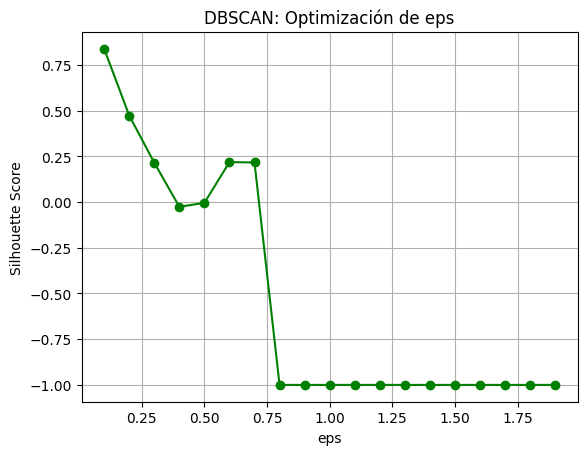

In [13]:
from sklearn.cluster import DBSCAN

eps_range = np.arange(0.1, 2.0, 0.1)
scores_dbscan = []

for eps in eps_range:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    
    # Verificamos que haya más de 1 cluster válido
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        mask = labels != -1
        score = silhouette_score(X_scaled[mask], labels[mask])
        scores_dbscan.append(score)
    else:
        scores_dbscan.append(-1)

plt.plot(eps_range, scores_dbscan, 'go-')
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.title("DBSCAN: Optimización de eps")
plt.grid(True)
plt.show()

<p>Para DBSCAN, se obtiene un Silhouette Score de casi 1 al utilizar un eps=0.1, esto nos da como el mejor resultado de todos.</p>

<h3>JERARQUICO</h3>

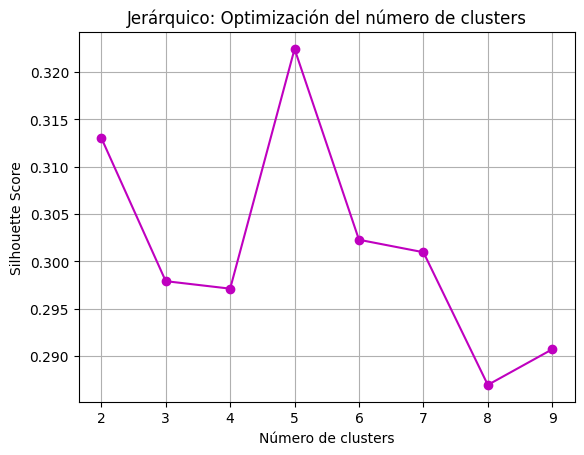

In [7]:
from sklearn.cluster import AgglomerativeClustering

cls = np.arange(2, 10)
scores_ac = np.zeros(len(cls))

for i, cl in enumerate(cls):
    ac = AgglomerativeClustering(n_clusters=cl)
    labels = ac.fit_predict(X_scaled)
    scores_ac[i] = silhouette_score(X_scaled, labels)

plt.plot(cls, scores_ac, 'm-o')
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.title("Jerárquico: Optimización del número de clusters")
plt.grid(True)
plt.show()

<p>El algoritmo jerárquico obtuvo con 5 clusters los mejores resultados para Silhouette Score, con un valor de 0.32, un poco superior al que obtuvo al principio.</p>

<h1>CONCLUSION</h1>
<p>Para concluir, con la primera prueba de los algoritmos, K-Means y Jerárquico obtuvieron los mejores resultados. En la busca de los mejores parámetros, DBSCAN obtuvo el mejor resultado, superando a los otros algoritmos. La correcta elección de los parámetros en los algoritmos nos brinda mejores resultados.</p>